In [1]:
!pip install GPro

In [2]:
import importlib
import GPro
importlib.reload(GPro)
from GPro.preference import ProbitPreferenceGP
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import norm

In [4]:
from scipy.stats import multivariate_normal
means = [np.array([-2, 3]), np.array([0, -3]), np.array([2, 2])]
covariances = [np.array([[2, 1], [1, 2]]), np.array([[10, -3], [-3, 4]]), np.array([[2, 0], [0, 2]])]
weights = [5/1.6, 22/1.6, 10/1.6]
step_size = 0.1
x, y = np.mgrid[-5:5+step_size:step_size, -5:5+step_size:step_size]
pos = np.dstack((x, y))
# print(pos.shape)
gmm_pdf = np.zeros(x.shape)
for mean, cov, weight in zip(means, covariances, weights):
    rv = multivariate_normal(mean, cov)
    gmm_pdf += weight * rv.pdf(pos)

In [10]:
np.random.seed(47)
X = np.random.uniform(low=-5, high=5, size=(100, 2))
M = np.zeros((50, 2))
for i in range(50):
    value1 = 0
    value2 = 0
    x = np.array([X[2*i], X[2*i+1]])
    for mean, cov, weight in zip(means, covariances, weights):
        rv = multivariate_normal(mean, cov)
        values = weight * rv.pdf(x)
        value1 += values[0]
        value2 += values[1]
    if value1 >= value2:
        M[i] = [2*i, 2*i+1]
    else:
        M[i] = [2*i+1, 2*i]
M = M.astype(int)

def get_metrics(corr_list):
    y_pred = []
    for point in pos:
        y_pred.append(gpr.predict(point, return_y_std=False))
    y_pred = np.array(y_pred)
    corr = np.corrcoef(gmm_pdf.flatten(), y_pred.flatten())[0, 1]
    print(">>> corr:", corr)
    corr_list.append(corr)

In [11]:
print(X)
print(M)

[[-3.86511528  4.74483094]
 [ 2.28734634 -1.48532194]
 [ 2.07605138  2.99604602]
 [ 1.45561855 -0.85400393]
 [ 2.06031011 -2.53350618]
 [-2.44007569 -4.75988646]
 [-4.01274045 -1.99563565]
 [ 1.40855678 -1.77792052]
 [-3.14505862  4.17193549]
 [-2.29079197 -2.26452108]
 [ 4.54412682 -3.72885429]
 [ 2.4726485  -4.94762044]
 [ 3.56790608  1.95956201]
 [ 0.53025704  4.35235797]
 [ 0.1262353  -3.22387934]
 [ 0.36865792 -2.06540182]
 [-4.89397947  3.83800718]
 [ 1.56410648  4.42255973]
 [ 2.44945298 -2.32789554]
 [-1.38137122  0.26403886]
 [ 0.46884971 -2.41329676]
 [-3.25363653 -1.39289742]
 [-3.59817735 -1.10921345]
 [-0.28111666  4.68826923]
 [-3.5443255   0.14254722]
 [ 0.2765183  -1.94757484]
 [-3.40325244  0.96911526]
 [-3.96271189  0.67966089]
 [-1.13693619 -4.15277952]
 [ 0.61999177  1.48071679]
 [ 1.61933945 -3.10757191]
 [ 4.54108945 -4.40975544]
 [ 3.80206236  2.83758161]
 [-2.47522585  4.27090523]
 [-0.552494   -1.22848666]
 [ 3.93823479  2.5405387 ]
 [ 2.74458016  3.79048511]
 

In [12]:
gpr = ProbitPreferenceGP()

In [13]:
corr_list = []
for i in tqdm(range(1, 51)):
  gpr.fit(X[:2*i], M[:i], f_prior=None)
  get_metrics(corr_list)

  2%|▏         | 1/50 [00:00<00:20,  2.43it/s]

>>> corr: 0.18928817699547493


  4%|▍         | 2/50 [00:01<00:31,  1.51it/s]

>>> corr: 0.18520401863236677


  6%|▌         | 3/50 [00:02<00:46,  1.02it/s]

>>> corr: 0.2102285000691164


  8%|▊         | 4/50 [00:05<01:18,  1.70s/it]

>>> corr: 0.26975731444532786


 10%|█         | 5/50 [00:08<01:32,  2.05s/it]

>>> corr: 0.37653861768442265


 12%|█▏        | 6/50 [00:11<01:45,  2.39s/it]

>>> corr: 0.42613554527711506


 14%|█▍        | 7/50 [00:14<02:01,  2.83s/it]

>>> corr: 0.43456633984833665


 16%|█▌        | 8/50 [00:20<02:35,  3.71s/it]

>>> corr: 0.3834191731653217


 18%|█▊        | 9/50 [00:25<02:49,  4.14s/it]

>>> corr: 0.3307416310908731


 20%|██        | 10/50 [00:32<03:21,  5.04s/it]

>>> corr: 0.32511795982084923


 22%|██▏       | 11/50 [00:39<03:36,  5.56s/it]

>>> corr: 0.15011494168076672


 24%|██▍       | 12/50 [00:48<04:07,  6.52s/it]

>>> corr: 0.09351301118143965


 26%|██▌       | 13/50 [00:56<04:21,  7.08s/it]

>>> corr: 0.1393458262967291


 28%|██▊       | 14/50 [01:06<04:46,  7.97s/it]

>>> corr: 0.13688010613922855


 30%|███       | 15/50 [01:17<05:12,  8.92s/it]

>>> corr: 0.2017574550520515


 32%|███▏      | 16/50 [01:29<05:37,  9.92s/it]

>>> corr: 0.18684120371994167


 34%|███▍      | 17/50 [01:43<06:01, 10.96s/it]

>>> corr: 0.1835916160218724


 36%|███▌      | 18/50 [01:57<06:27, 12.09s/it]

>>> corr: 0.13166199529049796


 38%|███▊      | 19/50 [02:13<06:51, 13.26s/it]

>>> corr: 0.08234197076486499


 40%|████      | 20/50 [02:30<07:09, 14.33s/it]

>>> corr: 0.11834820518695392


 42%|████▏     | 21/50 [02:49<07:30, 15.55s/it]

>>> corr: 0.11703974861378341


 44%|████▍     | 22/50 [03:07<07:40, 16.45s/it]

>>> corr: 0.15358788746748397


 46%|████▌     | 23/50 [03:29<08:05, 17.97s/it]

>>> corr: 0.2224906472356369


 48%|████▊     | 24/50 [03:50<08:11, 18.91s/it]

>>> corr: 0.22989170759487643


 50%|█████     | 25/50 [04:13<08:25, 20.21s/it]

>>> corr: 0.2461193642021016


 52%|█████▏    | 26/50 [04:37<08:31, 21.31s/it]

>>> corr: 0.2472755941718837


 54%|█████▍    | 27/50 [05:02<08:33, 22.34s/it]

>>> corr: 0.22908379379441024


 56%|█████▌    | 28/50 [05:28<08:35, 23.44s/it]

>>> corr: 0.11989686569578


 58%|█████▊    | 29/50 [05:55<08:35, 24.56s/it]

>>> corr: 0.18452608952884458


 60%|██████    | 30/50 [06:23<08:32, 25.64s/it]

>>> corr: 0.15678976211663428


 62%|██████▏   | 31/50 [06:56<08:49, 27.85s/it]

>>> corr: 0.17910703947811765


 64%|██████▍   | 32/50 [07:28<08:44, 29.16s/it]

>>> corr: 0.13528614416751097


 66%|██████▌   | 33/50 [08:00<08:31, 30.08s/it]

>>> corr: 0.07356531079163843


 68%|██████▊   | 34/50 [08:33<08:13, 30.84s/it]

>>> corr: 0.11943101170926218


 70%|███████   | 35/50 [09:08<07:58, 31.93s/it]

>>> corr: 0.28206522593116523


 72%|███████▏  | 36/50 [09:43<07:41, 32.95s/it]

>>> corr: 0.2773097882126715


 74%|███████▍  | 37/50 [10:19<07:19, 33.83s/it]

>>> corr: 0.2980095936896118


 76%|███████▌  | 38/50 [10:57<07:00, 35.01s/it]

>>> corr: 0.35066546938695764


 78%|███████▊  | 39/50 [11:34<06:33, 35.76s/it]

>>> corr: 0.26876758665789824


 80%|████████  | 40/50 [12:13<06:06, 36.60s/it]

>>> corr: 0.24504812875949805


 82%|████████▏ | 41/50 [12:52<05:37, 37.48s/it]

>>> corr: 0.25885615486507896


 84%|████████▍ | 42/50 [13:33<05:08, 38.56s/it]

>>> corr: 0.32737777694181663


 86%|████████▌ | 43/50 [14:15<04:36, 39.47s/it]

>>> corr: 0.38511125766334553


 88%|████████▊ | 44/50 [14:57<04:01, 40.24s/it]

>>> corr: 0.37285244813649976


 90%|█████████ | 45/50 [15:40<03:25, 41.13s/it]

>>> corr: 0.3663832341110613


 92%|█████████▏| 46/50 [16:25<02:49, 42.26s/it]

>>> corr: 0.3771354362528899


 94%|█████████▍| 47/50 [17:11<02:10, 43.55s/it]

>>> corr: 0.3670648071531261


 96%|█████████▌| 48/50 [17:58<01:28, 44.34s/it]

>>> corr: 0.3630280862330342


 98%|█████████▊| 49/50 [18:47<00:45, 45.70s/it]

>>> corr: 0.3634414008755623


100%|██████████| 50/50 [20:09<00:00, 24.18s/it]

>>> corr: 0.3439755388039091


In [14]:
corr_list

[np.float64(0.18928817699547493),
 np.float64(0.18520401863236677),
 np.float64(0.2102285000691164),
 np.float64(0.26975731444532786),
 np.float64(0.37653861768442265),
 np.float64(0.42613554527711506),
 np.float64(0.43456633984833665),
 np.float64(0.3834191731653217),
 np.float64(0.3307416310908731),
 np.float64(0.32511795982084923),
 np.float64(0.15011494168076672),
 np.float64(0.09351301118143965),
 np.float64(0.1393458262967291),
 np.float64(0.13688010613922855),
 np.float64(0.2017574550520515),
 np.float64(0.18684120371994167),
 np.float64(0.1835916160218724),
 np.float64(0.13166199529049796),
 np.float64(0.08234197076486499),
 np.float64(0.11834820518695392),
 np.float64(0.11703974861378341),
 np.float64(0.15358788746748397),
 np.float64(0.2224906472356369),
 np.float64(0.22989170759487643),
 np.float64(0.2461193642021016),
 np.float64(0.2472755941718837),
 np.float64(0.22908379379441024),
 np.float64(0.11989686569578),
 np.float64(0.18452608952884458),
 np.float64(0.156789762116

(10201, 1)


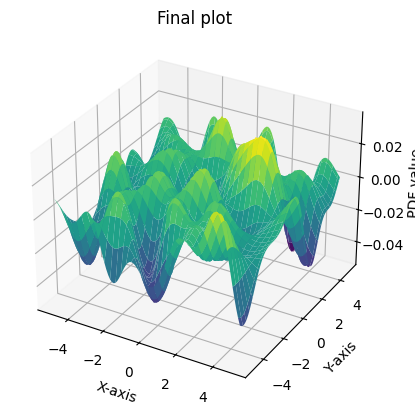

In [15]:
step_size = 0.1
x, y = np.mgrid[-5:5+step_size:step_size, -5:5+step_size:step_size]
pos = np.dstack((x, y))
Xpred = pos.reshape(-1, 2)
y_pred = gpr.predict(Xpred)
print(y_pred.shape)
y_pred_mean = np.mean(y_pred, axis=1).reshape(x.shape)
y_pred_std = np.std(y_pred, axis=1)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, y_pred_mean, cmap='viridis')
# ax.view_init(elev=90, azim=-90)
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('PDF value')
ax.set_title('Final plot')
# plt.show()
plt.savefig("sim2_bl1.pdf")